# 1. Common data problems
**In this chapter, you'll learn how to overcome some of the most common dirty data problems. You'll convert data types, apply range constraints to remove future data points, and remove duplicated data points to avoid double-counting.**

## Data type constraints
### Why do we need to clean data?
In a typical data science workflow, we usually access our raw data, explore and process it, develop insights using visualizations or predictive models, and finally report these insights with dashboards or reports.

Dirty data can appear because of duplicate values, mis-spellings, data type parsing errors and legacy systems.

Without making sure that data is properly cleaned in the exploration and processing phase, we will surely compromise the insights and reports subsequently generated. As the old adage says, garbage in garbage out.

### Data type constraints
When working with data, there are various types that we may encounter along the way. We could be working with text data, integers, decimals, dates, zip codes, and others. 

Luckily, Python has specific data type objects for various data types that you're probably familiar with by now. This makes it much easier to manipulate these various data types in Python. As such, before preparing to analyze and extract insights from our data, we need to make sure our variables have the correct data types, other wise we risk compromising our analysis.

### Example: Strings to Intergers
Here's the head of a DataFrame containing revenue generated and quantity of items sold for a sales order. We want to calculate the total revenue generated by all sales orders. 

```python
# Import CSV fil and output header
sales = pd.read_csv('sales.csv')
sales.head(2)
```
```
    SalesOrderID    Revenue    Quantity
0          43659     23153$          12
1          43668      1457$           2
```
As you can see, the Revenue column has the dollar sign on the right hand side. 

```python
# Get data types of columns
sales.dtypes
```
```
SalesOrderID    int64
Revenue         object
Quantity        int64
dtype: object
```
A close inspection of the DataFrame column's data types using the `.dtypes` attribute returns object for the Revenue column, which is what pandas uses to store strings.
 
Also check the data types as well as the number of missing values per column in a DataFrame, by using the `.info()` method.
```python
# Get DataFrame information
sales.info()
```
```
<class 'pandas.core'frame.DataFram'>
RangeIndex: 31456 entries, 0 to 31464
Data columns (total 3 columns):
SalesOrderID    31465 non-null int64
Revenue         31465 non-null object
Quantity        31465 non-null int64
dtype: int64(2) object(1)
memory usage: 737.5+ KB
```

Since the Revenue column is a string, summing across all sales orders returns one large concatenated string containing each row's string.
```python
# Print sum of all Revenue column
sales['Revenue'].sum()
```
```
23153$1457$36865$34252$4453$...
```


To fix this, we need to first remove the dollar sign from the string so that pandas is able to convert the strings into numbers without error. We do this with the `.str.strip()` method, while specifying the string we want to strip as an argument, which is in this case the dollar sign. Since our dollar values do not contain decimals, we then convert the Revenue column to an integer by using the `.astype()` method, specifying the desired data type as argument. Had our revenue values been decimal, we would have converted the Revenue column to float.
```python
# Remove dollar sign from revenue column
sales['Revenue'] = sales['Revenue'].str.strip('$')
sales['Revenue'] = sales['Revenue'].astype('int')
```

We can make sure that the Revenue column is now an integer by using the assert statement, which takes in a condition as input, as returns nothing if that condition is met, and an error if it is not.
```python
assert sales['Revenue'].dtype == 'int'
```

### Example: Numeric or categorical?
A common type of data seems numeric but actually represents categories with a finite set of possible categories. This is called categorical data. 

Here we have a marriage status column, which is represented by 0 for never married, 1 for married, 2 for separated, and 3 for divorced. 
```
...    marriage_status    ...
...                  1    ...
...                  3    ...
...                  0    ...
```
`0` = Never married    `1` = Married    `2` = Separated    `3` = Divorced

However it will be imported of type integer, which could lead to misleading results when trying to extract some statistical summaries.
```python
df['marriage_status'].describe()
```
```
       marriage_status
...
mean              1.4
std               0.20
min               0.00
50%               1.8 ...
```
We can solve this by using the same `.astype()` method seen earlier, but this time specifying the category data type. 
```python
# Convert to categorical
df['marriage_status'] = df['marriage_status'].astype('category')
df.describe()
```
```
       marriage_status
count              241
unique             4
top                1
freq               120
```

When applying the describe again, we see that the summary statistics are much more aligned with that of a categorical variable, discussing the number of observations, number of unique values, most frequent category instead of mean and standard deviation.

## Common data types
Manipulating and analyzing data with incorrect data types could lead to compromised analysis as you go along the data science workflow.

When working with new data, you should always check the data types of your columns using the `.dtypes` attribute or the `.info()` method which you'll see in the next exercise. Often times, you'll run into columns that should be converted to different data types before starting any analysis.

## Numeric data or ... ?
You'll be working with bicycle ride sharing data in San Francisco called `ride_sharing`.

In [24]:
import pandas as pd
ride_sharing = pd.read_csv('ride_sharing.csv')
display(ride_sharing.head(2))

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male


 It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The `user_type` column contains information on whether a user is taking a free ride and takes on the following values:

   - `1` for free riders.
   - `2` for pay per ride.
   - `3` for monthly subscribers.

In this instance, you will print the information of `ride_sharing` using `.info()` and see a firsthand example of how an incorrect data type can flaw your analysis of the dataset. 

- Print the information of `ride_sharing`.

In [4]:
# Print the information of ride_sharing
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None


- Use `.describe()` to print the summary statistics of the `user_type` column from `ride_sharing`.

In [5]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


The `user_type` column has an finite set of possible values that represent groupings of data, it should be converted to `category`.

- Convert `user_type` into categorical by assigning it the `'category'` data type and store it in the `user_type_cat column`.
- Make sure you converted `user_type_cat` correctly by using an `assert` statement.

In [8]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


*Take a look at the new summary statistics, it seems that most users are pay per ride users.*

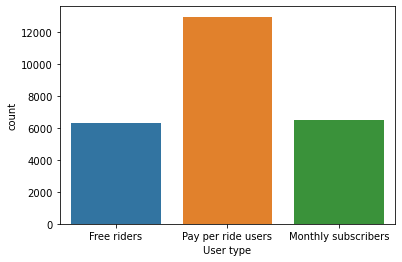

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

x_label = ['Free riders', 'Pay per ride users', 'Monthly subscribers']

ax = sns.countplot(data=ride_sharing, x='user_type')
ax.set_xticklabels(x_label)
ax.set_xlabel('User type')
plt.show()

## Summing strings and concatenating numbers
In the previous exercise, you were able to identify that `category` is the correct data type for `user_type` and convert it in order to extract relevant statistical summaries that shed light on the distribution of `user_type`.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column `duration` to the type `int`. Before that however, you will need to make sure to strip `"minutes"` from the column in order to make sure `pandas` reads it as numerical. 

- Use the `.strip()` method to strip `duration` of `"minutes"` and store it in the `duration_trim` column.
- Convert `duration_trim` to `int` and store it in the `duration_time` column.
- Write an `assert` statement that checks if `duration_time`'s **data type** is now an `int`.
- Print the average ride duration.

In [34]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# View formed columns
display(ride_sharing[['duration', 'duration_trim', 'duration_time']])

# Calculate average ride duration
print(ride_sharing['duration_time'].mean())

,duration,duration_trim,duration_time
0,12 minutes,12,12
1,24 minutes,24,24
2,8 minutes,8,8
3,4 minutes,4,4
4,11 minutes,11,11
...,...,...,...
25755,11 minutes,11,11
25756,10 minutes,10,10
25757,14 minutes,14,14
25758,14 minutes,14,14


11.389052795031056


*11 minutes seems really not bad for an average ride duration in a city like San-Francisco.*

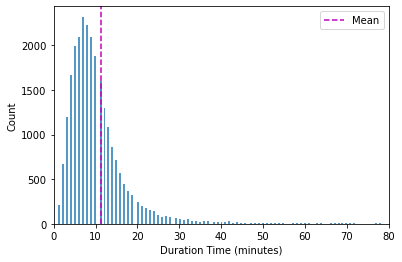

In [63]:
fig, ax = plt.subplots()
sns.histplot(ride_sharing['duration_time'], ax=ax)
ax.set(xlabel='Duration Time (minutes)', xlim=(0,80))

ax.axvline(x=ride_sharing['duration_time'].mean(), color='m', label='Mean', linestyle='--')

ax.legend()
plt.show()

---

## Data range constraints
### How to deal with out of range data?
- Dropping data: 
    - The simplest option is to drop the data. *However*, depending on the size of your out of range data, you could be losing out on essential information. As a rule of thumb, only drop data when a small proportion of your dataset is affected by out of range values, but you really need to understand your dataset before deciding to drop values. 
- Setting custome minimums and maximums
- Treat as missing and impute
- Setting custom value depending on business assumptions

### Movie example
Let's take a look at the movies example. We first isolate the movies with ratings higher than 5.
```python
import pandas as pd
# Output Movies with rating > 5
movies[movies['avg_rating'] > 5]
```
```
            movie_name    avg_rating
23    A Beautiful Mind             6
65     La Vita e Bella             6
77              Amelie             6
```
Now if these values are affect a small set of our data, we can drop them. 

We can drop them in two ways:
1. we can either create a new filtered movies DataFrame where we only keep values of `avg_rating` lower or equal than to 5.

```python
# Drop values using filtering
movies = movies[movies['avg_rating'] <= 5]
```

2. Or drop the values by using the drop method. The drop method takes in as argument the row indices of movies for which the `avg_rating` is higher than 5. We set the `inplace` argument to `True` so that values are dropped in place and we don't have to create a new column.

```python
# Drop values using .drop()
movies.drop(movies[movies['avg_rating'] > 5].index, inplace = True)
```

We can make sure this is set in place using an `assert` statement that checks if the maximum of `avg_rating` is lower or equal than to 5.

```python
# Assert results
assert movies['avg_rating'].max() <= 5
```

Depending on the assumptions behind our data, we can also change the out of range values to a hard limit. For example, here we're setting any value of the `avg_rating` column in to 5 if it goes beyond it. We can do this using the `.loc` method, which returns all cells that fit a custom row and column index. 

```python
# Convert avg_rating > 5 to 5
movies.loc[movies['avg_rating'] > 5, 'avg_rating'] = 5
```

It takes as first argument the row index, or here all instances of `avg_rating` above 5 and as second argument the column index, which is here the `avg_rating` column. Again, we can make sure that this change was done using an `assert` statement

```python
# Assert results
assert movies['avg_rating'].max() <= 5
```

### Date range example
Let's take another at the date range example, where we had subscriptions happening in the future. 

We first look at the datatypes of the column with the `.dtypes` attribute. 

```python
import datetime as dt
import pandas as pd
# Output data types
user_sugnups.dtype
```

```
subscription_date    object
user_name            object
Country              object
dtype: object
```

We can confirm that the `subscription_date` column is an object and not a `datetime` object. Datetime objects allow much easier manipulation of date data, so let's convert it to that. 

We do so with the `to_datetime` function from `pandas`, which takes in as argument the column we want to convert. 

```python
# Convert to DateTime
user_signups['subscription_date'] = pd.to_datetime(user_signups['subscription_date'])
```

We can then test the data type conversion by asserting that the subscription date's column is equal to `datetime64[ns]`, which is how the data type is represented in pandas.

```python
# Assert that conversion happened
assert user_signups['subscription_date'].dtype == 'datetime64[ns]'
```

Now that the column is in `datetime`, we can treat it in a variety of ways. We first create a `today_date` variable using the datetime function `date.today`, which allows us to store today's date.

```python
today_date = dt.date.today()
```

We can then either drop the rows with exceeding dates similar to how we did in the average rating example, 

```python
# Drop values using filtering
user_signups = user_signups[user_signups['subscription_date'] < today_date]
# Drop values using .drop()
user_signups.drop(user_signups[user_signups['subscription_date'] > todat_date].index, inplace = True)
```          

or replace exceeding values with today's date. 

```python
# Drop values using filtering
user_signups.loc[user_signups['subscription_date'] > today_date, 'subscription_date'] = today_date
```

In both cases we can use the `assert` statement to verify our treatment went well, by comparing the maximum value in the subscription_date column. However, make sure to chain it with the `.date()` method to return a datetime object instead of a timestamp.

```python
# Assert is true
assert user_signups.subscription_date.max().date() <= today_date
```

## Tire size constraints
In this lesson, you're going to build on top of the work you've been doing with the `ride_sharing` DataFrame. You'll be working with the `tire_sizes` column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the `tire_sizes` column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

- Convert the `tire_sizes` column from `category` to `'int'`.
- Use `.loc[]` to set all values of `tire_sizes` above 27 to 27.
- Reconvert back `tire_sizes` to `'category'` from `int`.
- Print the description of the `tire_sizes`.

```python
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())
```

```
count     25760
unique        2
top          27
freq      13274
Name: tire_sizes, dtype: int64
```

## Back to the future
A new update to the data pipeline feeding into the `ride_sharing` DataFrame has been updated to register each ride's date. This information is stored in the `ride_date` column of the type `object`, which represents strings in `pandas`.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the `ride_date` column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert `ride_date` to a `datetime` object.

The `datetime` package has been imported as `dt`, alongside all the packages you've been using till now.

- Convert `ride_date` to a `datetime` object and store it in `ride_dt` column using `to_datetime()`.
- Create the variable `today`, which stores today's date by using the `dt.date.today()` function.
- For all instances of `ride_dt` in the future, set them to today's date.
- Print the maximum date in the `ride_dt` column.

```python
# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())
```

```
2021-07-22 00:00:00
```

---

## Uniqueness constraints
### What are duplicate values?
Duplicate values can be diagnosed when we have the same exact information repeated across multiple rows, for a some or all columns in our DataFrame.
### Why do they happen?
Apart from data entry and human errors alluded to in the previous slide, duplicate data can also arise because of bugs and design errors whether in business processes or data pipelines. However they oftenmost arise from the necessary act of joining and consolidating data from various resources, which could retain duplicate values.



### How to find duplicate values?
We can find duplicates in a DataFrame by using the `.duplicated()` method. 

```python
# Get duplicates across all columns
duplicates = height_weight.duplicated()
print(duplicates)
```
```
1      False
...    ...
22     True
23     False
...    ...
```

It returns a Series of boolean values that are `True` for duplicate values, and `False` for non-duplicated values.

We can see exactly which rows are affected by using brackets as such.

```python
# Get duplicate rows
duplicates = height_weight.duplicated()
height_weight[duplicated]
```

However, using `.duplicated()` without playing around with the arguments of the method can lead to misleading results, as all the columns are required to have duplicate values by default, with all duplicate values being marked as `True` except for the first occurrence. This limits our ability to properly diagnose what type of duplication we have, and how to effectively treat it.

To properly calibrate how we go about finding duplicates, we will use 2 arguments from the `.duplicated()` method. The subset argument lets us set a list of column names to check for duplication.

**The `.duplicated()` method**
- `subset`: List of column names to check for duplication.
- `keep`: Whether to keep **first**(`'first'`), **last**(`'last'`) or **all**(`False`) duplicate values.

For example, it allows us to find duplicates for the first and last name columns only. The keep argument lets us keep the first occurrence of a duplicate value by setting it to the string first, the last occurrence of a duplicate value by setting it the string last, or keep all occurrences of duplicate values by setting it to `False`. 

```python
# Columns names to check for duplication
column_names = ['first_name', 'last_name', 'address']
duplicates = height_weight.duplicated(subset = column_names, keep = False)
```

In this example, we're checking for duplicates across the `first name`, `last name`, and `address` variables, and we're choosing to keep all duplicates.

We sort the duplicate rows using the `.sort_values` method, choosing `first_name` to sort by.

```python
# Output duplicate values
height_weight[duplicates].sort_values(by = 'first_name')
```
### How to treat duplicate values?
The complete duplicates can be treated easily. All that is required is to keep one of them only and discard the others.

This can be done with the `.drop_duplicates()` method, which also takes in the same `subset` and `keep` arguments as in the `.duplicated()` method, as well as the `inplace` argument which drops the duplicated values directly inside the `height_weight` DataFrame. 

**The `.duplicated()` method**
- `subset`: List of column names to check for duplication.
- `keep`: Whether to keep **first**(`'first'`), **last**(`'last'`) or **all**(`False`) duplicate values.
- `inplace`: Drop duplicated rows directly inside DataFrame without creating new object(`True`).

Here we are dropping complete duplicates only, so it's not necessary nor advisable to set a subset, and since the keep argument takes in first as default, we can keep it as such. 

```python
# Drop duplicates
height_weight.drop_duplicates(inplace = True)
```

Note that we can also set it as last, but not as `False` as it would keep all duplicates.

```python
# Output duplicate values
column_names = ['first_name', 'last_name', 'address']
duplicates = height_weight.duplicated(subset = column_names, keep = False)
height_weight[duplicates].sort_values(by = 'first_name')
```

This leaves us with the other 2 sets of duplicates discussed earlier, which are the same for `first_name`, `last_name` and `address`, but contain discrepancies in height and weight. Apart from dropping rows with really small discrepancies, we can use a statistical measure to combine each set of duplicated values.

```
       first_name    last_name    height    weight
28        Desirae      Shannon       195        83
103       Desirae      Shannon       196        83
1            Ivor       Pierce       168        66
101          Ivor       Pierce       168        88
```

We can do this easily using the groupby method, which when chained with the agg method, lets you group by a set of common columns and return statistical values for specific columns when the aggregation is being performed.

**The `.groupby()` and `.agg()` methods**

For example here, we created a dictionary called summaries, which instructs groupby to return the maximum of duplicated rows for the height column, and the mean duplicated rows for the weight column. 

```python
# Group by column names and produce statistical summaries
column_names = ['first_name', 'last_name', 'address']
summaries = {'height': 'max', 'weight': 'mean'}
height_weight = height_weight.groupby(by = column_names).agg(summaries).reset_index()
```

We then group `height_weight` by the column names defined earlier, and chained it with the agg method, which takes in the summaries dictionary we created. We chain this entire line with the `.reset_index()` method, so that we can have numbered indices in the final output. 

```python
# Make sure aggregation is done
duplicates = height_weight.duplicated(subset = column_names, keep = False)
height_weight[duplicates].sort_values(by = 'first_name')
```

We can verify that there are no more duplicate values by running the duplicated method again, and use brackets to output duplicate rows.

## How big is your subset?
You have the following `loans` DataFrame which contains loan and credit score data for consumers, and some metadata such as their first and last names. You want to find both complete and incomplete duplicates using `.duplicated()`.

first_name | last_name | credit_score | has_loan
:---|:---|:---|:---
Justin | Saddlemeyer | 600 | 1
Hadrien | Lacroix | 450 | 0

Choose the **correct** usage of `.duplicated()` below:

1. ~~`loans.duplicated()`: Because the default method returns both complete and incomplete duplicates.~~

2. ~~`loans.duplicated(subset = 'first_name')`: Because constraining the duplicate rows to the first name lets me find incomplete duplicates as well.~~
    
3. `loans.duplicated(subset = ['first_name', 'last_name'], keep = False)` : Because subsetting on consumer metadata and not discarding any duplicate returns all duplicated rows.

4. ~~`loans.duplicated(subset = ['first_name', 'last_name'], keep = 'first')`: Because this drops all duplicates.~~

**Answer: 3**

Subsetting on metadata and keeping all duplicate records gives you a better bird-eye's view over your data and how to duplicate it. You can even subset the `loans` DataFrame using bracketing and sort the values so you can properly identify the duplicates.

## Finding duplicates
A new update to the data pipeline feeding into `ride_sharing` has added the `ride_id` column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the `ride_sharing` DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates.

- Find duplicated rows of `ride_id` in the `ride_sharing` DataFrame while setting `keep` to `False`.
- Subset `ride_sharing` on `duplicates` and sort by `ride_id` and assign the results to `duplicated_rides`.
- Print the `ride_id`, `duration` and `user_birth_year` columns of `duplicated_rides` in that order.

```python
# Find duplicates
duplicates = ride_sharing.duplicated(subset=['ride_id'], keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])
```

```
        ride_id  duration  user_birth_year
    22       33        10             1979
    39       33         2             1979
    53       55         9             1985
    65       55         9             1985
    74       71        11             1997
    75       71        11             1997
    76       89         9             1986
    77       89         9             2060
```

*Notice that rides 33 and 89 are incomplete duplicates, whereas the remaining are complete.*

## Treating duplicates
In the last exercise, you were able to verify that the new update feeding into `ride_sharing` contains a bug generating both complete and incomplete duplicated rows for some values of the `ride_id` column, with occasional discrepant values for the `user_birth_year` and `duration` columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average `duration`, and the minimum `user_birth_year` for each set of incomplete duplicate rows.

- Drop complete duplicates in `ride_sharing` and store the results in `ride_dup`.
- Create the `statistics` dictionary which holds **minimum** aggregation for `user_birth_year` and **mean** aggregation for `duration`.
- Drop incomplete duplicates by grouping by `ride_id` and applying the aggregation in `statistics`.
- Find duplicates again and run the `assert` statement to verify de-duplication.

```python
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby(by = 'ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0
```

*You can bet after this fix that ride sharing KPIs will come back to normal.*